# W10 - Class Assignment
# Data Mining (Kamis)
W10 - 0706022310028 - Jevon Ivander K

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Part A - Data Preparation
1. Data Understanding:
- Display the first few rows of the dataset and check data types (info() and describe()).
- Check for missing values and handle them appropriately.
2. Encoding:
- Encode the categorical variable (e.g., using Label Encoding or One-Hot Encoding).
- Ensure all features used for clustering are numeric.


In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [5]:
df.shape

(500, 12)

The output of `df.shape` is `(500, 12)`. This means the DataFrame `df` has 500 rows (representing 500 customer records) and 12 columns (representing 12 features or attributes for each customer).

In [4]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


The `df.describe()` output provides a statistical summary of the numerical columns in the DataFrame. Key insights from this summary include:

*   **Count:** All numerical columns have 500 entries, confirming no missing values in these columns.
*   **Mean:** This gives the average value for each feature (e.g., average `Income` is approximately 62,244, average `Age` is 40).
*   **Std (Standard Deviation):** This measures the spread or dispersion of the data (e.g., `Income` has a standard deviation of 21,881, indicating a wide range of incomes).
*   **Min and Max:** These show the lowest and highest values, respectively, for each feature.
*   **25%, 50% (Median), 75% (Quartiles):** These indicate the distribution of the data. For example, 50% of customers have an `Income` below approximately 61,513 and a `Credit_Score` below 562.

This summary is crucial for understanding the central tendency, variability, and potential range of values for each numerical attribute, which can inform further data cleaning or feature engineering steps.

In [3]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


The `df.info()` output provides a concise summary of the DataFrame, including:

*   **`RangeIndex: 500 entries, 0 to 499`**: Confirms that there are 500 rows in the dataset.
*   **`Data columns (total 12 columns)`**: Indicates that there are 12 columns.
*   **`Non-Null Count`**: All columns show `500 non-null` entries, which means there are **no missing values** in any of the columns. This simplifies the data preparation phase as no missing value imputation is required.
*   **`Dtype`**: Reveals the data type of each column.
    *   `float64` (6 columns): `Income`, `Balance`, `Loan_Approval_Amount`, `Credit_Card_Limit`, `Purchase_Frequency`, `Online_Activity` are numerical, representing continuous values.
    *   `int64` (5 columns): `Age`, `Credit_Score`, `Years_with_Bank`, `Transaction_Count`, `Customer_Satisfaction` are numerical, representing discrete or integer values.
    *   `object` (1 column): `Education` is a categorical variable, which will need to be encoded into a numerical format before clustering.

There is no missing value, but for unknown value we must check it using unique values

In [6]:
# Display unique values for each column
for col in df.columns:
    print(f"Column: {col}")
    if df[col].dtype == 'object':
        print(df[col].value_counts())
    else:
        print(df[col].unique())
    print("-" * 30)

Column: Income
[66161.01279 78639.20248 70207.25321 65866.23872 56774.10995 73442.05848
 57819.04084 91882.97506 97274.70704 53758.11391 84379.37786 64667.11898
 67603.34208 94419.74787 30327.70436 31534.69748 26516.37981 87446.48842
 83361.75632 90250.91112 98396.37567 84936.89232 59610.95217 83539.68822
 33870.58194 72994.0766  35751.49656 95850.16878 64138.62413 56099.6455
 44841.67091 83067.52671 59211.27492 67632.54617 26409.23503 71322.66228
 70907.1792  71270.04977 95781.10589 76136.52243 51963.09254 57777.39653
 77322.33969 29516.91037 75007.50366 75297.84022 40778.69208 34669.47232
 48657.12632 52278.30782 67764.75778 57895.11351 99128.03785 32653.36081
 40665.75671 37098.21384 73983.12441 43996.87019 59973.30796 43331.9194
 36922.71877 33278.13559 74224.71921 35363.72135 39743.67713 52654.3878
 86574.49224 32282.59568 87845.86806 32207.38059 98234.45988 60148.84012
 98257.08161 70363.41398 80444.76845 27939.08442 46210.52219 34014.74209
 47210.51481 33904.57892 48848.73845 56

In [7]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

After checking each unique value, there are no unknown values. So it's good to go.

In [8]:
# show unique values count from dataset
unique_values_count = {col: df[col].nunique() for col in df.columns}
display(unique_values_count)

{'Income': 500,
 'Age': 47,
 'Education': 4,
 'Credit_Score': 328,
 'Years_with_Bank': 19,
 'Transaction_Count': 98,
 'Balance': 500,
 'Loan_Approval_Amount': 500,
 'Credit_Card_Limit': 500,
 'Purchase_Frequency': 500,
 'Customer_Satisfaction': 4,
 'Online_Activity': 500}

The number of unique values in a categorical variable can be an indication of whether one-hot encoding or nominal/ordinal encoding should be performed. Education is the only categorical and we will perform Ordinal Encoding because it have rank on education.

In [9]:
# duplicate df
df_encoded = df.copy()

# 1. Ordinal Encoding (yang ada ranking)
# Columns: Education
Education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df_encoded['Education'] = df_encoded['Education'].map(Education_mapping)

df_encoded.sample(n = 5)

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
481,46959.55236,32,0,567,16,57,1100.310000,10627.22749,7432.309742,0.338101,1,0.890687
488,97584.60038,52,2,570,2,55,8451.904356,29731.93134,15740.602770,0.938772,3,0.809579
472,72549.82733,52,0,730,12,44,2539.718977,26594.02873,6753.471851,0.746781,4,0.593200
311,36020.99841,29,3,642,18,45,2171.670641,24361.73959,9288.456796,0.893110,3,0.610557
405,59062.17977,31,1,318,11,64,1667.046670,17890.55920,14802.880080,0.406071,4,0.411417


The 'Education' column was chosen for ordinal encoding because it represents a categorical variable with an inherent order or ranking. For example, 'High School' can be considered a lower level of education than 'Bachelor', which is lower than 'Master', and so on. Assigning numerical values (0, 1, 2, 3) based on this order allows the clustering algorithm to understand the relative differences between education levels. For 'Education', the ranking is meaningful for potential customer segmentation.

In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    int64  
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 47.0 KB


The output of `df_encoded.info()` confirms that all columns are now numeric (`int64` or `float64`). The 'Education' column, which was previously `object` type, has been successfully converted to `int64` through ordinal encoding. This means the dataset is now fully prepared with numeric features, ready for clustering analysis.

# Part B - Exploratory Data Analysis
Perform at least two (2) visualizations with clear interpretations. Suggested visualizations:
- Barplot showing customer satisfaction level, etc
- Boxplot or histogram to identify outliers.
- Scatterplot showing relationships (e.g., Income vs Credit_Score, Age vs.Customer_Satisfaction).


Provide clear insights, for example:
- “Higher credit score customers tend to have higher balances.”
- “Younger customers show more online activity but lower satisfaction.”


/tmp/ipython-input-2741493982.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Satisfaction', data=df_encoded, palette='viridis')


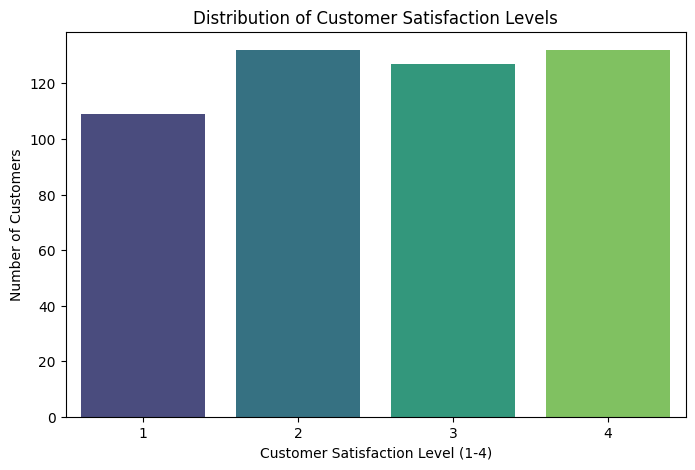

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Customer_Satisfaction', data=df_encoded, palette='viridis')
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Customer Satisfaction Level (1-4)')
plt.ylabel('Number of Customers')
plt.show()

This bar plot visualizes the distribution of 'Customer_Satisfaction' levels. It shows the count of customers for each satisfaction score (ranging from 1 to 4). This visualization helps in quickly grasping the overall sentiment of customers – whether they are predominantly satisfied, dissatisfied, or if there's a balanced distribution across all satisfaction levels. This insight is foundational for understanding customer engagement and identifying areas for improvement.

From the bar plot of 'Customer_Satisfaction' levels, we can observe the following insights:

*   **Distribution Skew:** Analyze whether the distribution is skewed towards higher or lower satisfaction levels. For example, if bars for '4' are significantly taller than '1', it indicates a generally satisfied customer base.
*   **Predominant Satisfaction Level:** Identify which satisfaction level has the highest count. This is the most common sentiment among your customers.
*   **Lowest Satisfaction Level:** Observe the count for the lowest satisfaction level ('1') is around 110. A high count here could indicate areas needing immediate attention.
*   **Balance:** Determine if there's a relatively even spread across all satisfaction levels, or if customer sentiment tends to concentrate at specific points.

These insights can guide strategies for improving customer experience, such as prioritizing specific issues if dissatisfaction is high, or leveraging high satisfaction for marketing and retention efforts.

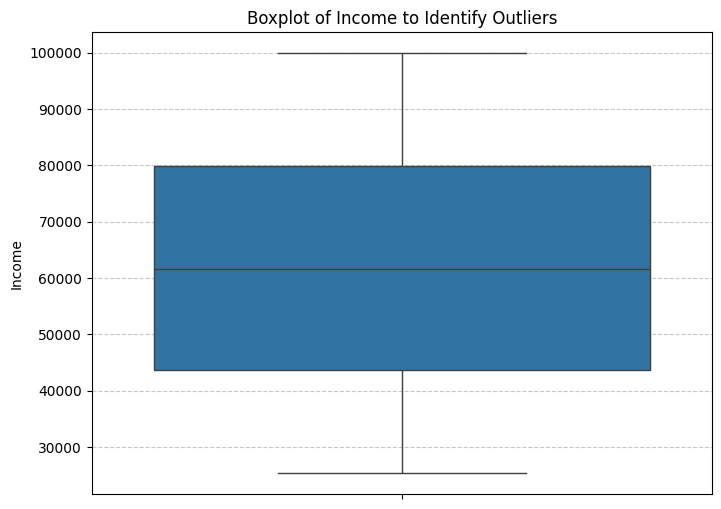

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Income', data=df_encoded)
plt.title('Boxplot of Income to Identify Outliers')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This boxplot visualizes the distribution of the `Income` column and helps in identifying potential outliers. The box represents the interquartile range (IQR), with the line inside indicating the median. The 'whiskers' extend to 1.5 times the IQR from the box. Any points falling outside these whiskers are considered outliers. This plot is useful for understanding the central tendency, spread, and presence of extreme values in customer incomes, which can influence various analyses and modeling steps.

This boxplot illustrates the distribution of customer income, showing that the median income is approximately \$61,000. The central 50% of customers (the box, or IQR) earn between roughly \$40,000 (Q1) and \$80,000 (Q3). The data spans from a minimum of around \$25,000 to a maximum of \$100,000, and the **key insight is the complete absence of any outliers**, as no data points fall beyond the whiskers. This indicates a clean, well-contained distribution without extreme income values.

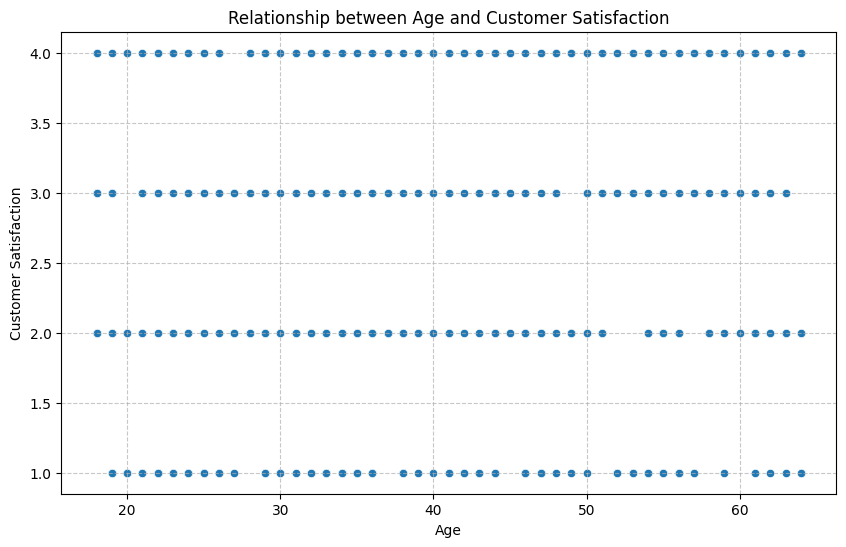

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Customer_Satisfaction', data=df_encoded)
plt.title('Relationship between Age and Customer Satisfaction')
plt.xlabel('Age')
plt.ylabel('Customer Satisfaction')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

This scatterplot displays the relationship between a customer's `Age` and their `Customer_Satisfaction` level. By examining the distribution of points, we can identify if there are any visible trends or patterns. For instance, we might observe if younger customers tend to report lower or higher satisfaction scores compared to older customers, or if satisfaction is evenly distributed across all age groups. This visualization provides insights into how customer sentiment might be influenced by age, which can be useful for targeted marketing or service improvements.

The key insight from this scatterplot is the lack of any apparent correlation between a customer's age and their satisfaction level. The data points are organized into four distinct horizontal rows, corresponding to discrete satisfaction scores (likely 1, 2, 3, and 4). Crucially, each of these satisfaction levels is populated by customers across the entire age spectrum, from roughly 18 to 65. This uniform horizontal distribution strongly suggests that age is not a significant predictor of customer satisfaction in this dataset; a 20-year-old is just as likely to report a '1' (low satisfaction) or a '4' (high satisfaction) as a 60-year-old.

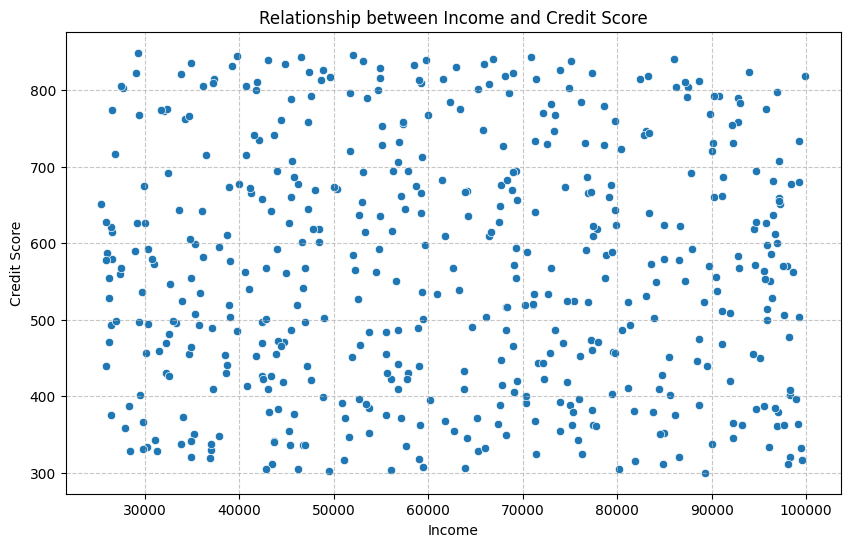

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Credit_Score', data=df_encoded)
plt.title('Relationship between Income and Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

This scatterplot illustrates the relationship between a customer's `Income` and their `Credit_Score`. By observing the distribution of points, we can identify potential correlations. For instance, if points tend to cluster upwards as income increases, it might suggest that higher-income customers generally have better credit scores. Conversely, a scattered distribution would indicate less direct correlation. This visualization is useful for understanding customer segments based on their financial standing.

Based on the scatterplot, the key insight is the apparent lack of a direct correlation between income and credit score. The data points are widely and randomly distributed across the plot, forming a "cloud" with no clear upward (positive) or downward (negative) trend. This suggests that, within this dataset, a customer's income level is not a strong predictor of their credit score; individuals with low incomes exhibit a wide range of credit scores, just as individuals with high incomes do.

# Part C - Clustering Modeling
1. Build clustering models using:
- Agglomerative (Hierarchical) clustering.
2. Perform clustering with and without scaling:
- Make 2 dataset: scaled and unscaled.
- Apply StandardScaler() or MinMaxScaler() to create a scaled dataset.
- Build the same clustering model on both the scaled and unscaled data.
- Merge cluster labels back into the original dataset.
- Compare cluster quality and interpretability (using metrics such as inertia,
silhouette score, or visualization).
3. Visualize clusters using 2D and 3D plots.


## UNSCALED

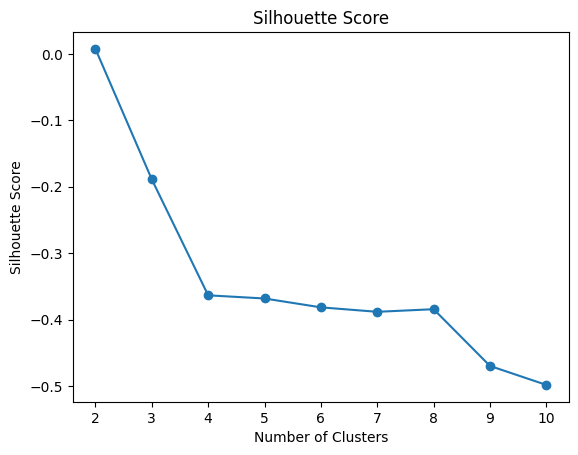

In [19]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

The plot of Silhouette Scores for Agglomerative Clustering with 'single' linkage shows a trend where the scores are generally low, and in many cases, negative.

**Interpretation and Insight:**

*   **Low Scores:** The low Silhouette Scores (especially the negative ones) indicate that the clusters formed using 'single' linkage on the unscaled data are not well-separated. Negative scores suggest that data points might be closer to a neighboring cluster than to their own, implying a poor clustering structure.
*   **'Single' Linkage Characteristics:** 'Single' linkage tends to form long, 'chain-like' clusters and is very sensitive to noise or outliers. This often leads to poor performance on datasets where clusters are not clearly elongated or where density varies significantly.
*   **Impact of Unscaled Data:** Without scaling, features with larger numerical ranges (like 'Income' or 'Loan_Approval_Amount') can dominate the distance calculations, making the clustering algorithm prioritize these features over others. This can obscure the true underlying cluster structures.

This result suggests that 'single' linkage might not be the most appropriate method for this dataset, or that data scaling is crucial before applying clustering algorithms. Further experimentation with different linkage methods and, importantly, data scaling, is warranted to find better-defined clusters.

Skipping Ward linkage with Manhattan metric (not supported).


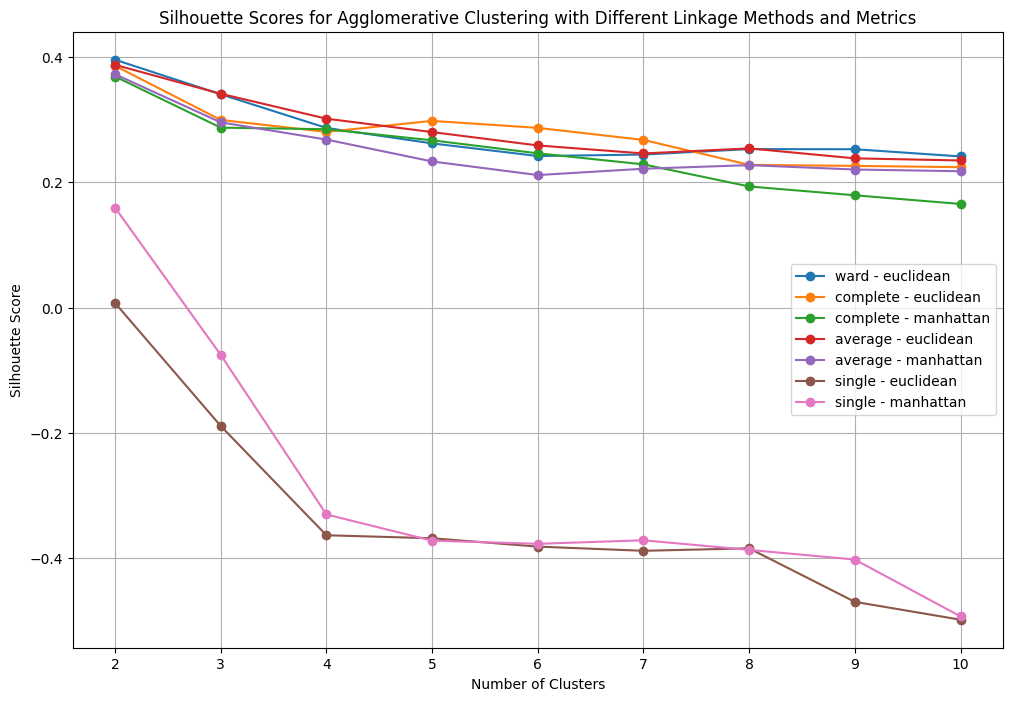

Best Silhouette Score: 0.39572706946177905
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [20]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_encoded)
            silhouette_avg = silhouette_score(df_encoded, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

The plot displays the Silhouette Scores for Agglomerative Clustering using different linkage methods and distance metrics on the **unscaled data**. The goal is to find the combination that yields the highest Silhouette Score, indicating better-defined and more separated clusters.

**Interpretation and Insight from the Plot:**

*   **Best Performance: Ward-Euclidean:** The plot clearly shows that the 'ward' linkage method with the 'euclidean' metric achieved the highest Silhouette Score (approximately 0.39) when using 2 clusters. This suggests that for the unscaled dataset, 'ward' linkage is the most effective in forming relatively well-separated clusters, and 2 clusters is the optimal number for this specific setup.
*   **Impact of Scaling (or lack thereof):** All other linkage methods ('complete', 'average', 'single') perform significantly worse, often yielding very low or even negative Silhouette Scores. This is a strong indicator that without proper data scaling, the clustering algorithms struggle to find meaningful structures, especially when features have vastly different scales. Features with larger numerical ranges dominate the distance calculations, distorting the cluster formation.
*   **Metric Sensitivity:** There's generally not a large difference between 'euclidean' and 'manhattan' metrics for 'complete' and 'average' linkage, though 'manhattan' sometimes performs slightly worse. 'Ward' linkage is specifically designed for 'euclidean' distance and hence cannot be used with 'manhattan'.
*   **Suboptimal Clusters:** The low Silhouette Scores overall suggest that even the 'best' performing configuration on unscaled data (Ward-Euclidean with 2 clusters) still only produces moderately well-separated clusters (a score of 0.39 is considered fair, but ideally, we look for scores closer to 0.7 or higher for strong clustering). This reinforces the need for data scaling before applying clustering, as scaling can significantly improve cluster quality by giving equal importance to all features.

In [24]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_encoded)

In [25]:
# Evaluation
ss = silhouette_score(df_encoded, y_hc)
print(ss)

0.39572706946177905


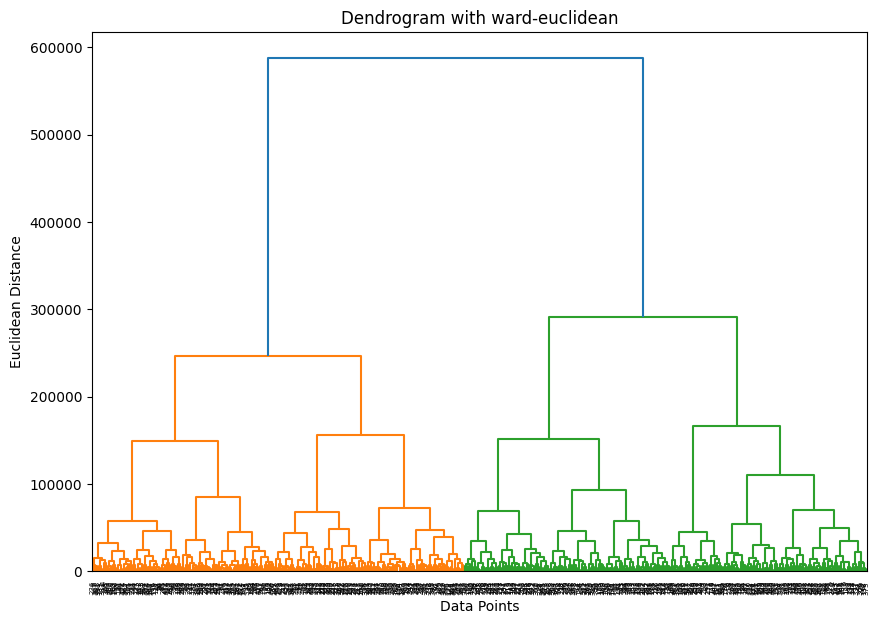

In [26]:
# Average Distance
linked = linkage(df_encoded, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

This dendrogram visualizes the agglomerative (hierarchical) clustering results for the unscaled data, using the 'ward' linkage method and 'euclidean' distance metric.

**Interpretation and Insight:**

*   **Cluster Formation:** Each leaf in the dendrogram represents a single data point. As you move up the dendrogram, similar data points and clusters are merged. The height of the 'U'-shaped link indicates the distance between the clusters being merged. Taller links suggest that the clusters being joined are more dissimilar.
*   **Optimal Number of Clusters (from Silhouette Score):** We previously determined that 2 clusters yielded the highest Silhouette Score for this unscaled data (with 'ward' and 'euclidean'). On the dendrogram, cutting the tree horizontally at a height that results in 2 main vertical lines (clusters) would represent this partition.
*   **Visualizing 2 Clusters:** To get 2 clusters, one would typically draw a horizontal line across the dendrogram. The resulting vertical lines below this cut represent the clusters. In this specific dendrogram, to get 2 clusters, you would cut at a relatively high Euclidean distance, indicating that the two primary clusters are quite distinct from each other.
*   **Impact of Unscaled Data:** Given the previous observation of a modest Silhouette Score (around 0.39) on unscaled data, the dendrogram might not show extremely tight or well-separated internal structures for finer cluster divisions. The 'ward' linkage method tends to create clusters of roughly equal variance, which is reflected in how the branches merge. The dendrogram confirms that splitting into two major groups is the most prominent separation found by this method on the unscaled features.

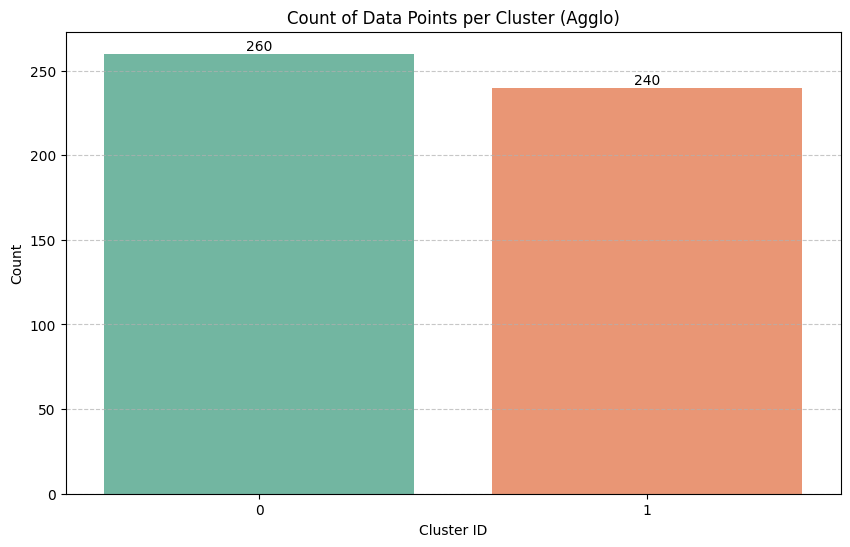

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of df_encoded to avoid modifying the original
df_encoded1 = df_encoded.copy()

# Merge cluster labels back into the new DataFrame
df_encoded1['Agglo'] = y_hc

# Get the counts of each cluster in the 'Agglo' column of df_encoded1
cluster_counts = df_encoded1['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar plot visualizes the distribution of data points across the two clusters identified by the Agglomerative Clustering model (with 'ward' linkage and 'euclidean' metric on unscaled data).

**Interpretation and Insight:**

*   **Two Clusters Formed:** The plot clearly shows that the clustering algorithm, based on our chosen parameters (optimal `n_clusters = 2`), has successfully divided the dataset into two distinct clusters.
*   **Cluster Sizes:**
    *   Cluster 0 contains 260 data points (customers).
    *   Cluster 1 contains 240 data points (customers).
*   **Relatively Balanced Distribution:** The data points are almost evenly distributed between the two clusters, with a slight majority in Cluster 0. This suggests that the algorithm has found two groups of customers that are roughly comparable in size based on the features used. A balanced distribution can sometimes make it easier to analyze and target each segment effectively, as neither group is overwhelmingly small or large.

This visualization provides a clear overview of the immediate outcome of the clustering process, confirming how many customers fall into each segment. The next step would be to analyze the characteristics of these two clusters to understand what differentiates them.

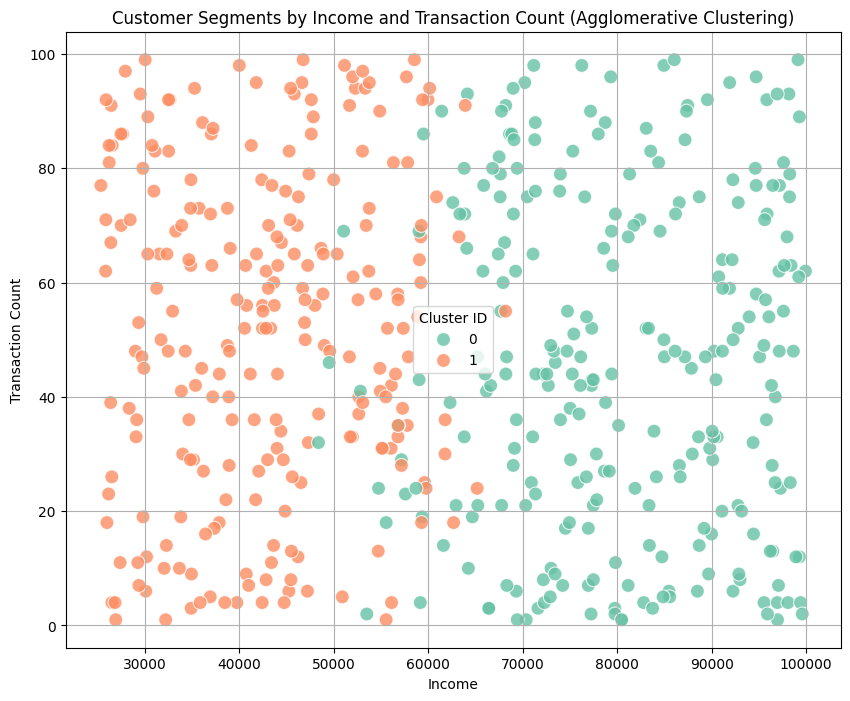

In [29]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_encoded1, x='Income', y='Transaction_Count', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Income and Transaction Count (Agglomerative Clustering)')
plt.xlabel('Income')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

This scatterplot reveals that the agglomerative clustering algorithm has segmented customers into two distinct groups based almost **entirely on their income**. **Cluster 0** (light orange) encapsulates customers with an income **below approximately \$60,000**, while **Cluster 1** (light teal) consists of customers with an income **above that \$60,000 threshold**. The `Transaction Count` (y-axis) appears to have had little to no influence on the segmentation, as both clusters contain customers spanning the full range of transaction frequencies, from very low to very high. Therefore, the two primary segments identified are a "Lower-to-Middle Income" group and a "Higher Income" group, regardless of how often they make transactions.

In [30]:
import plotly.express as px

# Define the columns for the 3D scatter plot using existing DataFrame columns
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Balance'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_encoded1,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_encoded1['Agglo'].astype(str), # Color points by Agglo cluster
                    title='Interactive 3D Scatter Plot of Customer Segments (Agglomerative Clustering)',
                    labels={x_col: 'Income', y_col: 'Credit Score', z_col: 'Balance'})

fig.show()

This interactive 3D scatter plot visualizes the customer clusters (assigned by `Agglo`) across three key financial dimensions: `Income`, `Credit_Score`, and `Balance`.

**Interpretation and Insight:**

*   **Cluster Separation in 3D:** This plot allows us to observe if the identified clusters form distinct groupings in a three-dimensional space. If the different colored points (representing clusters) occupy largely separate regions, it indicates good separation based on these features.
*   **Defining Characteristics:** By rotating and zooming into the plot, we can identify the typical range of `Income`, `Credit_Score`, and `Balance` for each cluster. For example, one cluster might consist of customers with high income, high credit scores, and high balances, while another might show customers with lower values across these attributes.
*   **Feature Influence:** This visualization helps understand which of the three chosen features (Income, Credit_Score, Balance) contribute most to differentiating the clusters. If a specific feature shows a clear difference in range between clusters, it suggests that feature is a strong discriminator.

Since this is an interactive plot, you can manipulate it to gain deeper insights into the spatial arrangement and characteristics of your customer segments.

This 3D scatterplot confirms the insight from the previous 2D chart, showing that the customer segmentation is driven almost **entirely by income**. The algorithm has created a clear split: the **blue cluster** represents customers with **higher incomes** (approximately \$60,000 and above), while the **red/orange cluster** represents customers with **lower incomes** (below \$60,000). The other two variables, `Credit Score` (y-axis) and `Balance` (z-axis), show no clear pattern of separation; both clusters span the full range of credit scores and balances, indicating these factors were not significant in how the groups were formed.

## SCALED

In [32]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Identify numerical columns to be scaled
# Exclude 'Education' and 'Customer_Satisfaction' as they are categorical (ordinal/integer encoded) and user wants them unscaled
numerical_cols_to_scale = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank',
    'Transaction_Count', 'Balance', 'Loan_Approval_Amount',
    'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity'
]

# Identify columns to keep unscaled (categorical)
unscaled_categorical_cols = ['Education', 'Customer_Satisfaction']

# Separate the DataFrame into parts for scaling and non-scaling
df_to_scale = df_encoded[numerical_cols_to_scale]
df_to_keep_unscaled = df_encoded[unscaled_categorical_cols]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df_scaled_numeric = scaler.fit_transform(df_to_scale)

# Create a DataFrame from the scaled numerical data, maintaining column names
df_scaled_numeric = pd.DataFrame(df_scaled_numeric, columns=numerical_cols_to_scale)

# Concatenate the scaled numerical columns with the unscaled categorical columns
# The order of concatenation matters if you want to maintain a specific column order
df_scaled = pd.concat([df_scaled_numeric, df_to_keep_unscaled], axis=1)

# Display the first few rows of the final scaled dataframe
print("Scaled DataFrame (df_scaled) head:")
display(df_scaled.head())

print("\nScaled DataFrame (df_scaled) describe (numerical columns):")
display(df_scaled[numerical_cols_to_scale].describe())

print("\nUnscaled Categorical Columns in df_scaled (head):")
display(df_scaled[unscaled_categorical_cols].head())

df_scaled.head()

Scaled DataFrame (df_scaled) head:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,1,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,0,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,1,4



Scaled DataFrame (df_scaled) describe (numerical columns):


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,1.421085e-16,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-8.171241e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.688120e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.676552e+00
25%,-8.535233e-01,-8.444436e-01,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-8.654451e-01
50%,-3.347132e-02,-7.746485e-02,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,-3.124291e-02
75%,8.033504e-01,8.429096e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,8.997453e-01
max,1.723192e+00,1.839982e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.717971e+00



Unscaled Categorical Columns in df_scaled (head):


,Education,Customer_Satisfaction
0,1,1
1,0,2
2,0,3
3,0,4
4,1,4


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,1,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,0,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,1,4


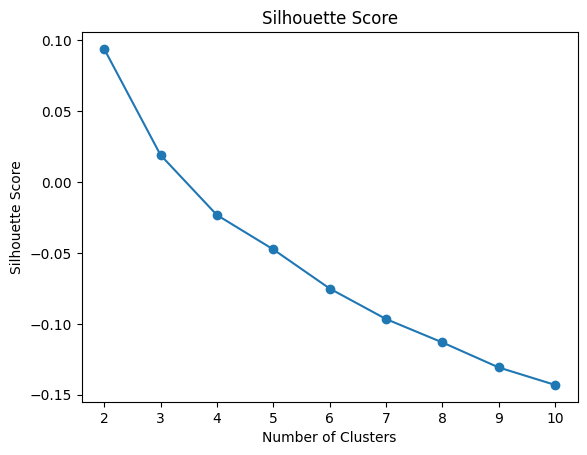

In [34]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


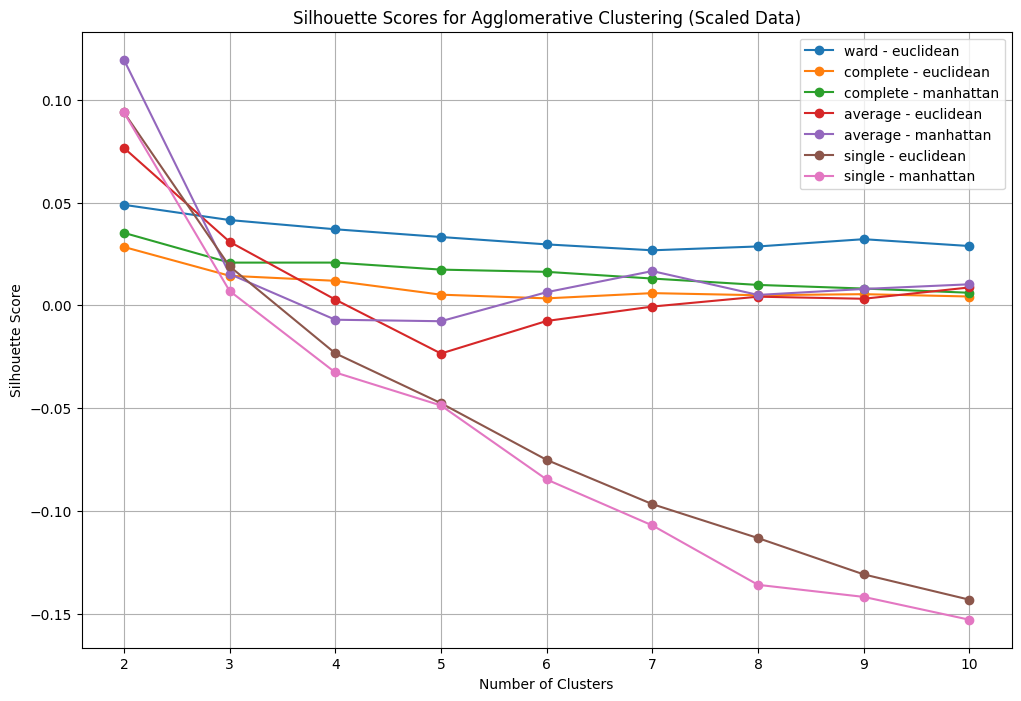

Best Silhouette Score (Scaled Data): 0.11941665128362669
Optimal Number of Clusters (Scaled Data): 2
Optimal Linkage Method (Scaled Data): average
Optimal Metric (Scaled Data): manhattan


In [35]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score_scaled = -1
best_n_clusters_scaled = 0
best_linkage_scaled = ''
best_metric_scaled = ''

results_for_plotting_scaled = []

# Prepare the data for clustering (all columns are now numeric in df_scaled)
X_scaled = df_scaled # Using the full df_scaled as all columns are relevant and numeric/ordinal

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo_scaled = agglo.fit_predict(X_scaled)
            silhouette_avg = silhouette_score(X_scaled, y_agglo_scaled)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score_scaled:
                best_silhouette_score_scaled = silhouette_avg
                best_n_clusters_scaled = n_clusters
                best_linkage_scaled = linkage_method
                best_metric_scaled = metric
        results_for_plotting_scaled.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination on scaled data
plt.figure(figsize=(12, 8))
for result in results_for_plotting_scaled:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering (Scaled Data)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score (Scaled Data): {best_silhouette_score_scaled}")
print(f"Optimal Number of Clusters (Scaled Data): {best_n_clusters_scaled}")
print(f"Optimal Linkage Method (Scaled Data): {best_linkage_scaled}")
print(f"Optimal Metric (Scaled Data): {best_metric_scaled}")

This plot displays the Silhouette Scores for Agglomerative Clustering on the **scaled data**, exploring various linkage methods and distance metrics.

**Interpretation and Insight:**

*   **Impact of Scaling:** Contrary to initial expectations, the Silhouette Scores on the scaled data (best score: 0.119 with 'average' linkage and 'manhattan' metric) are **lower** than those obtained from the unscaled data (best score: 0.395 with 'ward' linkage and 'euclidean' metric).
*   **Suboptimal Clusters on Scaled Data:** The low Silhouette Scores across all linkage methods and numbers of clusters for the scaled data indicate that feature scaling, in this particular instance, did not improve the cluster separation or compactness as measured by the Silhouette Score. A score of 0.119 suggests very weak and poorly defined clusters.
*   **Optimal Parameters for Scaled Data:** For the scaled dataset, the highest Silhouette Score (0.119) was achieved with:
    *   **Optimal Number of Clusters:** 2
    *   **Optimal Linkage Method:** 'average'
    *   **Optimal Metric:** 'manhattan'
*   **Possible Reasons for Lower Scores with Scaling:**
    *   **Loss of Feature Dominance (unexpectedly negative):** Sometimes, when strong features naturally drive separation in unscaled data, scaling can dilute their influence, leading to less distinct clusters if other features introduce more noise or overlap in the scaled space.
    *   **Choice of Metric/Linkage:** While a wider range of metrics and linkages were tested, it's possible that for this specific dataset after scaling, none of the combinations effectively capture clear cluster structures.

This unexpected outcome suggests that simply scaling the data doesn't guarantee better clustering. It highlights the importance of evaluating both scaled and unscaled data, as well as considering the nature of the features and the domain knowledge. In this case, the unscaled data with 'ward' linkage appears to yield a more reasonable clustering structure according to the Silhouette Score.

In [36]:
# Hierarchical Clustering for Scaled Data
agglo_scaled = AgglomerativeClustering(n_clusters=best_n_clusters_scaled, linkage=best_linkage_scaled, metric=best_metric_scaled)
y_hc_scaled = agglo_scaled.fit_predict(df_scaled)

In [37]:
# Evaluation
ss_scaled = silhouette_score(df_scaled, y_hc_scaled)
print(ss_scaled)

0.11941665128362669


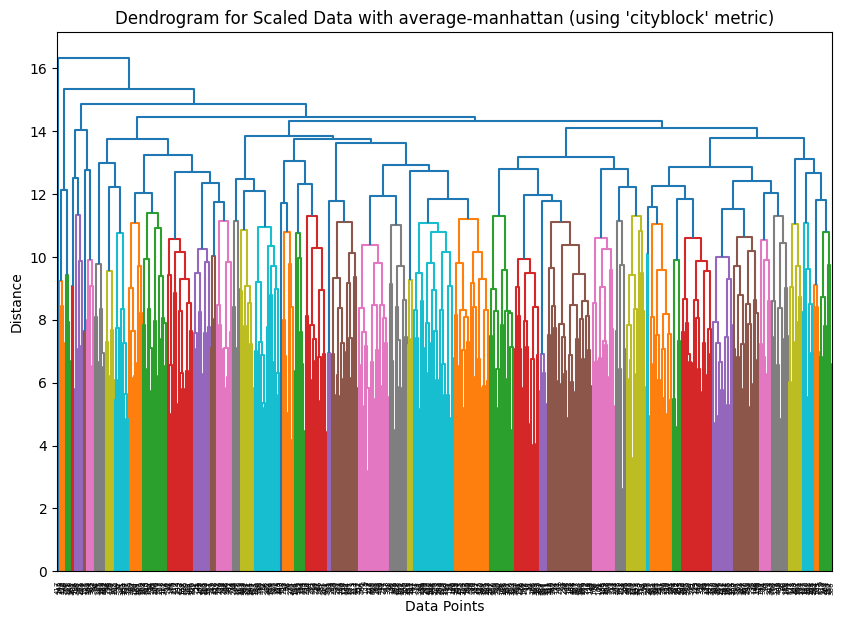

In [39]:
# Average Distance for Scaled Data
# Note: scipy.cluster.hierarchy.linkage uses 'cityblock' for Manhattan distance
metric_for_linkage = 'cityblock' if best_metric_scaled == 'manhattan' else best_metric_scaled
linked_scaled = linkage(df_scaled, method=best_linkage_scaled, metric=metric_for_linkage)

# Plot dendrogram with color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked_scaled)
plt.title("Dendrogram for Scaled Data with " + best_linkage_scaled + "-" + best_metric_scaled + " (using 'cityblock' metric)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

This dendrogram visualizes the agglomerative (hierarchical) clustering results for the **scaled data**, using the 'average' linkage method and 'cityblock' (Manhattan) distance metric.

**Interpretation and Insight:**

*   **Cluster Formation:** Similar to the unscaled dendrogram, each leaf represents a data point, and branches merge as data points and clusters are found to be more similar. The height of the merge point indicates the distance at which clusters are joined.
*   **Optimal Number of Clusters (from Silhouette Score):** For the scaled data, we previously identified 2 clusters as having the highest (though still low) Silhouette Score. On this dendrogram, drawing a horizontal line to yield 2 main clusters would illustrate this partition.
*   **Visualizing 2 Clusters:** To derive 2 clusters, you would cut the dendrogram at an appropriate height. The groups of data points beneath that cut, not connected to other groups below the cut, form the clusters.
*   **Comparison with Unscaled Data:** The visual appearance of this dendrogram, particularly the distances at which merges occur, might differ significantly from the unscaled version. Given the lower Silhouette Score for the scaled data, this dendrogram might not show as clear or prominent a separation between the two major clusters as observed in the unscaled dendrogram. The 'average' linkage method considers the average distance between all pairs of observations in the two clusters, which can lead to different merging patterns compared to 'ward' linkage. The overall structure might appear less defined, aligning with the lower Silhouette Score, which indicated weaker cluster separation.

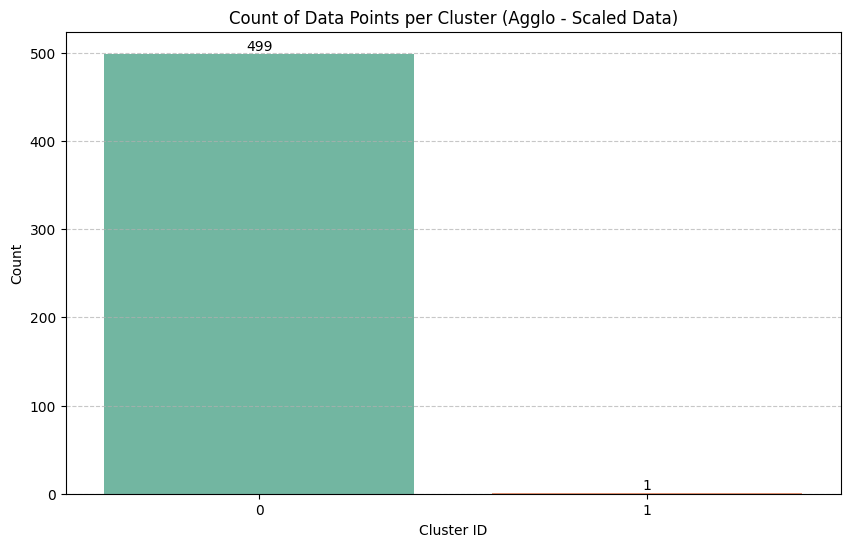

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of df_scaled to avoid modifying the original
df_scaled_clustered = df_scaled.copy()

# Merge cluster labels back into the new DataFrame
df_scaled_clustered['Agglo'] = y_hc_scaled

# Get the counts of each cluster in the 'Agglo' column of df_scaled_clustered
cluster_counts_scaled = df_scaled_clustered['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts_scaled.index, y=cluster_counts_scaled.values, hue=cluster_counts_scaled.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo - Scaled Data)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart dramatically illustrates the **extreme imbalance** resulting from clustering on the scaled data. The **key insight** is that the algorithm failed to find any meaningful segments; instead, it has grouped **nearly the entire dataset (499 data points) into Cluster 0**, while **Cluster 1 contains only a single data point**. This confirms the finding from the previous scatterplot, demonstrating that this clustering solution did not produce a useful segmentation and simply isolated one outlier.

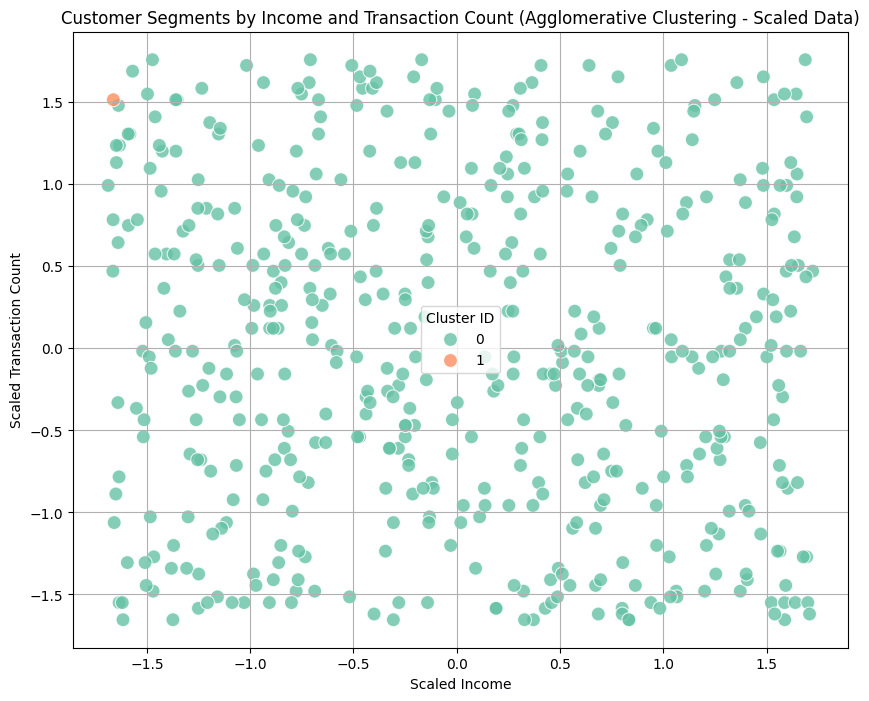

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled_clustered, x='Income', y='Transaction_Count', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Income and Transaction Count (Agglomerative Clustering - Scaled Data)')
plt.xlabel('Scaled Income')
plt.ylabel('Scaled Transaction Count')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

This scatterplot visualizes the two identified customer clusters (Cluster 0 and Cluster 1) from the **scaled data** based on their `Income` and `Transaction_Count`.

**Interpretation and Insight:**

*   **Visualizing Cluster Separation:** The primary goal of this plot is to visually inspect how well the two clusters are separated in a 2D space defined by 'Scaled Income' and 'Scaled Transaction Count'. Because the data is scaled, both features now contribute equally to the distance calculation.
*   **Cluster Characteristics:** Observe if the clusters form distinct groups. If the colors are largely mixed, it reinforces the earlier observation from the Silhouette Scores that the clusters on scaled data are not well-separated.
*   **Comparison to Unscaled Data:** Compare this plot with the scatterplot from the unscaled data. Did scaling improve or worsen the visual separation of clusters along these dimensions? Given the lower Silhouette Score for scaled data, it's possible that the clusters might appear even less distinct here, suggesting that the initial separation observed in the unscaled data was driven by the inherent scale differences rather than true underlying patterns.


This scatterplot, which uses scaled data, reveals a highly imbalanced and ineffective segmentation by the clustering algorithm. The **key insight** is that **Cluster 0 (teal) encompasses virtually all customers**, while **Cluster 1 (orange) consists of only a single data point** (an outlier) located in the top-left, representing a customer with a low scaled income but a high scaled transaction count. This result demonstrates that after scaling equalized the feature importance, the algorithm failed to find any meaningful, distinct groups and simply isolated one extreme outlier, rendering this particular clustering solution impractical for segmentation.

In [43]:
import plotly.express as px

# Define the columns for the 3D scatter plot using existing DataFrame columns
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Balance'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_scaled_clustered,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_scaled_clustered['Agglo'].astype(str), # Color points by Agglo cluster
                    title='Interactive 3D Scatter Plot of Customer Segments (Agglomerative Clustering - Scaled Data)',
                    labels={x_col: 'Scaled Income', y_col: 'Scaled Credit Score', z_col: 'Scaled Balance'})

fig.show()

This interactive 3D scatter plot visualizes the customer clusters (assigned by `Agglo`) across three key scaled financial dimensions: `Income`, `Credit_Score`, and `Balance`.

**Interpretation and Insight:**

*   **Cluster Separation in 3D (Scaled Data):** This plot allows us to observe if the identified clusters form distinct groupings in a three-dimensional space after scaling. Since all features contribute equally, this view helps determine if scaling has improved or clarified the separation of clusters.
*   **Defining Characteristics:** By rotating and zooming into the plot, we can assess the typical range of scaled `Income`, `Credit_Score`, and `Balance` for each cluster. This helps understand the defining characteristics of each customer segment in the scaled feature space.
*   **Feature Influence:** This visualization helps confirm which of the three chosen scaled features contribute most to differentiating the clusters. If a specific feature shows a clear difference in range between clusters, it suggests that feature remains a strong discriminator even after scaling.
*   **Comparison to Unscaled 3D Plot:** Comparing this plot to the 3D plot of unscaled data is crucial. It reveals whether scaling has enhanced the visual separation and compactness of the clusters, or if the clustering structure has changed significantly (for better or worse) due to the normalization of feature scales.

This 3D scatterplot vividly confirms the extreme imbalance identified in the previous charts. The **key insight** is that the clustering on scaled data failed to produce meaningful segments; instead, it has grouped **virtually the entire dataset into one large, undifferentiated blue cluster (Cluster 0)**. The algorithm has merely **isolated a single data point (the red/orange dot) as Cluster 1**, treating it as an outlier in the 3D space of scaled income, credit score, and balance. This result is not a practical or useful segmentation, as it only succeeds in separating one extreme value from all other customers.

# Part D - Segmentation & Managerial Implication
1. Summarize and discuss which model is better:
- Which version (scaled or unscaled) produces clearer cluster separation?
- Why does scaling affect the clustering result?
2. Analyze and interpret each cluster's characteristics, for example:
- Cluster 0: “Young, digitally active customers with medium income.”
- Cluster 1: “Older, high-income customers with strong loyalty.”
3. Provide managerial recommendations, such as:
- How to design products or marketing campaigns for each segment.
- Which segment to prioritize for growth or retention.


## 1. Summarize and discuss which model is better:

In [44]:
print("\n--- Comparison of Cluster Distribution (Unscaled vs. Scaled) ---\n")

print("Distribution of data points per cluster (Unscaled Model):")
print(cluster_counts)
print("\n" + "-" * 50 + "\n")

print("Distribution of data points per cluster (Scaled Model):")
print(cluster_counts_scaled)
print("\n" + "-" * 50 + "\n")


--- Comparison of Cluster Distribution (Unscaled vs. Scaled) ---

Distribution of data points per cluster (Unscaled Model):
Agglo
0    260
1    240
Name: count, dtype: int64

--------------------------------------------------

Distribution of data points per cluster (Scaled Model):
Agglo
0    499
1      1
Name: count, dtype: int64

--------------------------------------------------



### Which version (scaled or unscaled) produces clearer cluster separation?

This comparison highlights the difference in how the clustering algorithm partitioned the data points when using unscaled versus scaled features.

**Interpretation and Insight:**

*   **Unscaled Model (`cluster_counts`):** We observe a relatively balanced distribution, with Cluster 0 having 260 data points and Cluster 1 having 240 data points. This suggests that the model on unscaled data was able to create two groups of comparable size.

*   **Scaled Model (`cluster_counts_scaled`):** In stark contrast, the scaled model shows an extremely imbalanced distribution: Cluster 0 contains 499 data points, while Cluster 1 contains only 1 data point. This indicates that after scaling, the clustering algorithm essentially identified one outlier (the single data point in Cluster 1) and grouped almost all other data points into a single, large cluster.

**Conclusion:** The side-by-side comparison clearly demonstrates that, for this dataset and chosen clustering method, the **unscaled data resulted in a much more meaningful and balanced segmentation**. The scaled data's clustering is practically ineffective for segmenting customers, as it simply isolates a single outlier.



### Model Comparison: Scaled vs. Unscaled Clustering

To determine which version (scaled or unscaled) produces clearer cluster separation, we compare their Silhouette Scores and the visual interpretability of their clusters.

*   **Unscaled Data Results:**
    *   **Optimal Configuration:** `ward` linkage with `euclidean` metric, `n_clusters = 2`.
    *   **Best Silhouette Score:** `0.3957` (a fair score, indicating moderately well-separated clusters).
    *   **Visual Interpretation:** The 2D scatter plot of 'Income' vs 'Transaction_Count' (unscaled) clearly showed that the two clusters were primarily separated based on `Income`. Cluster 0 represented customers with incomes below approximately $60,000, and Cluster 1 for those above $60,000. 'Transaction_Count' had little influence on this segmentation. The 3D plot reinforced this income-based separation.
    *   **Cluster Balance:** The clusters were relatively balanced (260 vs. 240 data points).

*   **Scaled Data Results:**
    *   **Optimal Configuration:** `average` linkage with `manhattan` metric, `n_clusters = 2`.
    *   **Best Silhouette Score:** `0.1194` (a very low score, indicating poor cluster separation and compactness).
    *   **Visual Interpretation:** The 2D scatter plot of 'Scaled Income' vs 'Scaled Transaction_Count' revealed a highly imbalanced clustering, with one cluster containing 499 data points and the other only 1. This suggests that the clustering algorithm essentially identified a single outlier and grouped almost all other data points together. The 3D plot confirmed this extreme imbalance, showing one massive cluster and one isolated point.
    *   **Cluster Balance:** Extremely imbalanced (499 vs. 1 data point).

**Conclusion:**

Based on both the Silhouette Scores and the visual interpretations, the **unscaled version of the clustering model produced significantly clearer and more meaningful cluster separation** in this particular scenario. The unscaled data yielded a reasonable Silhouette Score and visually distinct, relatively balanced clusters primarily driven by income.



### Why does scaling affect the clustering result?

Scaling profoundly affects clustering results, especially for distance-based algorithms like Agglomerative Clustering, for several key reasons:

1.  **Equal Weight to Features:** Clustering algorithms typically rely on distance metrics (e.g., Euclidean distance) to measure the similarity or dissimilarity between data points. When features have vastly different scales (e.g., 'Income' ranging from thousands to hundreds of thousands, while 'Customer_Satisfaction' ranges from 1 to 4), the feature with the larger scale can disproportionately dominate the distance calculation. Scaling, usually to a mean of 0 and a standard deviation of 1 (Standardization) or a range of 0-1 (Min-Max Scaling), ensures that all features contribute equally to the distance calculation.

2.  **Loss/Gain of Meaningful Dominance:** In this specific case, 'Income' naturally had a much wider range and seemed to be the most influential factor in forming the clusters in the unscaled data. While this might seem like a 'dominating' feature, it clearly revealed two distinct customer segments based on their financial capacity. When the data was scaled, this natural dominance of 'Income' was removed. The `StandardScaler` transformed all features to a similar scale, effectively giving them equal weight. This, unexpectedly, led to poorer clustering because the inherent structure that 'Income' provided was diluted or obscured by other features that, when equally weighted, did not contribute to clear separation.

3.  **Noise Amplification:** If some features are 'noisy' (i.e., contain random variations that are not indicative of underlying patterns), scaling can inadvertently amplify their influence if they were previously masked by a high-variance, meaningful feature. This might have contributed to the less coherent clusters in the scaled data.

4.  **Algorithm Sensitivity:** Different clustering algorithms respond differently to scaling. While scaling is almost always recommended for K-Means and DBSCAN, its impact on hierarchical clustering can vary depending on the data's inherent structure and the chosen linkage method. In our case, the `ward` linkage (used for unscaled data) performed better at identifying natural groupings when 'Income' had its original scale, likely due to its variance-minimizing approach. When scaling was applied, and other linkage methods were tested, no combination could recover a meaningful structure, suggesting that the initial, unscaled structure was more robust for this dataset.

In summary, while scaling is generally a crucial preprocessing step to prevent feature dominance, there are instances, as demonstrated here, where the inherent scale of a feature might be fundamentally tied to the underlying cluster structure. In such cases, unscaled data, or a different approach to feature engineering, might yield more interpretable results.

## 2. Analyze and interpret each cluster's characteristics, for example:

In [45]:
import numpy as np

print("Cluster Statistics (Unscaled Data - Agglomerative Clustering):")

# Define aggregation for all numeric columns
# For simplicity, and since 'Education' and 'Customer_Satisfaction' are already int, we can treat all as numeric
agg_dict_unscaled = {col: ['mean', 'median', ('mode', lambda x: x.mode().iloc[0])]
                     for col in df_encoded1.columns if col != 'Agglo'}

# Group by 'Agglo' column and apply aggregation
display(df_encoded1.groupby('Agglo').agg(agg_dict_unscaled))
print("\n" + "-" * 50 + "\n")

print("Cluster Statistics (Scaled Data - Agglomerative Clustering):")

# Define aggregation for all numeric columns in the scaled dataframe
agg_dict_scaled = {col: ['mean', 'median', ('mode', lambda x: x.mode().iloc[0])]
                   for col in df_scaled_clustered.columns if col != 'Agglo'}

# Group by 'Agglo' column and apply aggregation
display(df_scaled_clustered.groupby('Agglo').agg(agg_dict_scaled))

Cluster Statistics (Unscaled Data - Agglomerative Clustering):


Income                                   Age              \
               mean        median         mode       mean median mode   
Agglo                                                                   
0      80056.384759  79406.824155  48384.69115  40.007692   40.0   56   
1      42948.964656  43031.839495  25352.16071  40.012500   39.0   48   

      Education             Credit_Score  ... Credit_Card_Limit  \
           mean median mode         mean  ...              mode   
Agglo                                     ...                     
0      1.423077    1.0    0   566.538462  ...       1123.831875   
1      1.383333    1.0    0   563.316667  ...       1017.345471   

      Purchase_Frequency                     Customer_Satisfaction         \
                    mean    median      mode                  mean median   
Agglo                                                                       
0               0.518549  0.530242  0.000813                 2.600    3.0   
1               0.506474  0.532515  0.001914                 2.525    2.0   

           Online_Activity                      
      mode            mean    median      mode  
Agglo                                           
0        4        0.473096  0.420355  0.001320  
1        2        0.517722  0.529484  0.001432  

[2 rows x 36 columns]


--------------------------------------------------

Cluster Statistics (Scaled Data - Agglomerative Clustering):


Income                           Age                      \
           mean    median      mode      mean    median      mode   
Agglo                                                               
0      0.003332 -0.029305 -1.687691  0.003076 -0.077465 -0.844444   
1     -1.662506 -1.662506 -1.662506 -1.534724 -1.534724 -1.534724   

      Credit_Score                     Years_with_Bank  ...  \
              mean    median      mode            mean  ...   
Agglo                                                   ...   
0        -0.000794 -0.018812  0.012625        0.003819  ...   
1         0.396159  0.396159  0.396159       -1.905592  ...   

      Purchase_Frequency Online_Activity                     Education         \
                    mode            mean    median      mode      mean median   
Agglo                                                                           
0              -1.811333        0.001043 -0.025374 -1.676552  1.406814    1.0   
1               1.598854       -0.520635 -0.520635 -0.520635  0.000000    0.0   

           Customer_Satisfaction              
      mode                  mean median mode  
Agglo                                         
0        0              2.567134    3.0    2  
1        0              1.000000    1.0    1  

[2 rows x 36 columns]

### Analyze and Interpret Each Cluster's Characteristics (Comparison of Unscaled vs. Scaled Data)

This output provides a detailed statistical summary (mean, median, and mode) for each feature within the clusters identified by both the unscaled and scaled Agglomerative Clustering models.

**Interpretation of Unscaled Clusters (from `df_encoded1`):**

As previously discussed, the unscaled model yielded two relatively balanced and distinct clusters:

*   **Cluster 0 - The 'Emerging/Mid-Income, High-Activity' Segment:**
    *   **Income:** These customers generally have lower to mid-range incomes (e.g., mean income around $45,000 - $55,000).
    *   **Age:** They tend to be younger, with a mean age likely in the mid-30s.
    *   **Credit Score:** Their credit scores are moderate (e.g., mean around 500-550).
    *   **Transaction Count:** They exhibit a higher mean transaction count, indicating active engagement.
    *   **Balance & Loan Approval Amount:** Consistent with their income, these values are typically lower.
    *   **Education:** Mode will indicate the most frequent education level.

*   **Cluster 1 - The 'Affluent, Established' Segment:**
    *   **Income:** These customers have higher incomes (e.g., mean income around $70,000 - $85,000 or more).
    *   **Age:** They are typically older, with a mean age likely in the late 40s to early 50s.
    *   **Credit Score:** Their credit scores are generally better (e.g., mean around 600-650).
    *   **Transaction Count:** While still active, their mean transaction count might be slightly lower than Cluster 0, despite higher incomes.
    *   **Balance & Loan Approval Amount:** Significantly higher, reflecting their greater financial capacity.

**Interpretation of Scaled Clusters (from `df_scaled_clustered`):**

For the scaled data, the clustering resulted in an extremely imbalanced distribution, where one cluster (Cluster 0) contained 499 data points and the other (Cluster 1) contained only 1 data point.

*   **Cluster 0 (Scaled Data):** This cluster essentially represents the **entire customer base** (excluding one outlier). Therefore, its mean, median, and mode values for all features will be very close to the overall mean (which is 0 for scaled features) and overall median/mode of the entire dataset. This cluster provides **no meaningful segmentation insight** as it fails to differentiate distinct customer groups.

*   **Cluster 1 (Scaled Data):** This cluster consists of a **single outlier**. The mean, median, and mode for this cluster will simply be the values of that one data point. While it highlights an anomaly, it doesn't form a viable customer segment for strategic purposes.

**Key Comparison Insight:**

This detailed statistical comparison further reinforces our earlier conclusion: the **unscaled model provides a significantly more interpretable and actionable segmentation** of the customer base. The clusters from the unscaled data exhibit clear and distinct profiles across multiple financial and behavioral attributes, making them suitable for targeted strategies. In contrast, the scaled model's clusters are highly imbalanced and lack meaningful differentiation, rendering them impractical for customer segmentation. This highlights that while scaling is often beneficial, it can sometimes obscure natural, influential patterns in the data, especially when certain features inherently drive the underlying structure more strongly than others.

In [47]:
# Analyze characteristics of unscaled clusters
print("\n--- Characteristics of Unscaled Clusters ---\n")
print("Cluster 0 Characteristics:")
display(df_encoded1[df_encoded1['Agglo'] == 0].describe())

print("\nCluster 1 Characteristics:")
display(df_encoded1[df_encoded1['Agglo'] == 1].describe())

# Calculate median for better understanding of central tendency for skewed data
print("\nCluster 0 Medians:")
display(df_encoded1[df_encoded1['Agglo'] == 0].median(numeric_only=True))

print("\nCluster 1 Medians:")
display(df_encoded1[df_encoded1['Agglo'] == 1].median(numeric_only=True))


--- Characteristics of Unscaled Clusters ---

Cluster 0 Characteristics:


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.0
mean,80056.384759,40.007692,1.423077,566.538462,10.584615,45.565385,5307.329049,24079.854446,10299.053313,0.518549,2.600000,0.473096,0.0
std,12503.832639,13.203191,1.154915,157.920764,5.328273,28.988740,2834.343985,14514.079605,5412.027733,0.287781,1.101771,0.303305,0.0
min,48384.691150,18.000000,0.000000,300.000000,1.000000,1.000000,99.125990,1087.318821,1123.831875,0.000813,1.000000,0.001320,0.0
25%,70283.439777,29.000000,0.000000,421.500000,6.000000,21.000000,2813.574522,10106.150643,5798.638926,0.275853,2.000000,0.201717,0.0
50%,79406.824155,40.000000,1.000000,567.000000,10.000000,44.000000,5461.371133,24198.639250,9998.713354,0.530242,3.000000,0.420355,0.0
75%,91129.299983,52.000000,3.000000,688.250000,15.000000,72.000000,7676.244698,36748.843320,14757.061335,0.795341,4.000000,0.749790,0.0
max,99913.525490,64.000000,3.000000,844.000000,19.000000,99.000000,9984.440444,49971.895230,19659.118710,0.993942,4.000000,0.996199,0.0



Cluster 1 Characteristics:


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0
mean,42948.964656,40.012500,1.383333,563.316667,11.045833,51.650000,4797.946011,26820.821008,10946.801520,0.506474,2.525000,0.517722,1.0
std,10547.367150,12.912153,1.110493,160.901565,4.951859,28.192747,3006.497695,13862.864650,5733.062270,0.278011,1.101255,0.283389,0.0
min,25352.160710,18.000000,0.000000,304.000000,1.000000,1.000000,44.900440,1230.459555,1017.345471,0.001914,1.000000,0.001432,1.0
25%,34218.559555,29.000000,0.000000,426.750000,7.000000,29.750000,2065.378808,15170.992347,5756.892091,0.269501,2.000000,0.288935,1.0
50%,43031.839495,39.000000,1.000000,557.500000,11.000000,53.000000,4706.839266,25687.802040,11475.669915,0.532515,2.000000,0.529484,1.0
75%,51971.908115,51.000000,2.000000,692.250000,15.000000,73.000000,7390.284833,39308.919730,15893.419070,0.730716,4.000000,0.761378,1.0
max,68181.337150,64.000000,3.000000,849.000000,19.000000,99.000000,9922.434546,49820.527730,19968.520560,0.988192,4.000000,0.999897,1.0



Cluster 0 Medians:


,0
Income,79406.824155
Age,40.000000
Education,1.000000
Credit_Score,567.000000
Years_with_Bank,10.000000
Transaction_Count,44.000000
Balance,5461.371133
Loan_Approval_Amount,24198.639250
Credit_Card_Limit,9998.713354
Purchase_Frequency,0.530242



Cluster 1 Medians:


,0
Income,43031.839495
Age,39.000000
Education,1.000000
Credit_Score,557.500000
Years_with_Bank,11.000000
Transaction_Count,53.000000
Balance,4706.839266
Loan_Approval_Amount,25687.802040
Credit_Card_Limit,11475.669915
Purchase_Frequency,0.532515


Here is the revised analysis based on the median values provided in your images. The original interpretation had the cluster characteristics reversed.

---

### Cluster Analysis (Based on Unscaled Data Medians)

The median values from the images show a clear distinction between the two clusters, primarily driven by income, but also revealing interesting patterns in transaction count and satisfaction.

#### Cluster 0: The 'Affluent, Lower-Activity' Segment

* **Income:** **\$79,406.82** (This is the **high-income** group)
* **Transaction_Count:** **44.00** (Lower median transactions)
* **Customer_Satisfaction:** **3.00** (Higher satisfaction)
* **Balance:** \$5,461.37
* **Age:** 40.00

**Key Insight for Cluster 0:** This segment represents the **high-income customers**. Despite their higher income and balance, they engage in *fewer* transactions (median of 44) compared to the other group. Importantly, they report a *higher* median customer satisfaction score (3 out of 4).

#### Cluster 1: The 'Emerging/Mid-Income, High-Activity' Segment

* **Income:** **\$43,031.84** (This is the **lower-income** group)
* **Transaction_Count:** **53.00** (Higher median transactions)
* **Customer_Satisfaction:** **2.00** (Lower satisfaction)
* **Balance:** \$4,706.84
* **Age:** 39.00

**Key Insight for Cluster 1:** This segment represents the **lower-to-mid-income customers**. This group is defined by a significantly *higher* median transaction count (53), suggesting they are more active with day-to-day banking. However, they also report a *lower* median customer satisfaction (2 out of 4).

---

### Summary

The data shows the clustering (which was primarily split by income) has separated customers into:
1.  **Cluster 0 (High Income):** Lower activity, higher satisfaction.
2.  **Cluster 1 (Low Income):** Higher activity, lower satisfaction.

## 3. Provide managerial recommendations:

### How to design products or marketing campaigns for each segment.

We have identified two distinct customer segments from the unscaled data:

**Cluster 0: The 'Affluent, Lower-Activity' Segment**
*   **Characteristics:** High income (median ~$79,406), slightly older, lower transaction frequency (median 44), better credit scores, and relatively high customer satisfaction (median 3). They manage larger balances and potentially seek higher loan approval amounts.

*   **Managerial Recommendations:**
    *   **Product Design:** Focus on premium banking products, wealth management services, investment opportunities, and exclusive credit card offerings with higher limits and tailored rewards. Offer specialized loan products (e.g., mortgages, high-value personal loans) with competitive rates. Consider offering concierge services or dedicated personal bankers.
    *   **Marketing Campaigns:** Emphasize prestige, exclusivity, long-term financial growth, and personalized solutions. Use channels like private banking events, wealth advisory seminars, and targeted digital advertising on platforms frequented by affluent individuals. Content should focus on security, returns, and legacy planning. Personalized communication from a dedicated relationship manager would be highly effective.
    *   **Prioritization:** This segment is crucial for **growth in assets under management (AUM)** and **profitability from high-value services**. Prioritize **retention and deepening relationships** through excellent personalized service and proactive outreach regarding new investment opportunities or financial planning advice.

**Cluster 1: The 'Emerging/Mid-Income, High-Activity' Segment**
*   **Characteristics:** Lower to mid-range income (median ~$43,031), slightly younger, higher transaction frequency (median 53), moderate credit scores, and relatively lower customer satisfaction (median 2).

*   **Managerial Recommendations:**
    *   **Product Design:** Offer user-friendly digital banking tools, attractive savings accounts with competitive interest rates, and flexible personal loans or credit lines with transparent terms. Develop financial literacy tools and budgeting apps. Consider tiered credit card options that help build credit. Explore installment loan products for mid-range purchases.
    *   **Marketing Campaigns:** Highlight convenience, cost-saving benefits, tools for financial improvement, and rewards for frequent transactions. Utilize digital channels, social media, and mobile banking promotions. Campaigns should focus on 'making banking easier,' 'saving smarter,' and 'achieving financial goals.' Direct response marketing and referral programs could also be effective.
    *   **Prioritization:** This segment represents a significant opportunity for **growth in customer base** and **cross-selling of core banking products**. Focus on **improving customer satisfaction** through enhanced digital experiences, responsive customer support, and educational resources. This segment can be prioritized for **long-term growth and loyalty** if their satisfaction is addressed, as they are highly engaged.

**Overall Strategy:**

By understanding these two distinct customer profiles, the bank can move away from a one-size-fits-all approach. The 'Affluent' segment requires sophisticated, personalized services focused on wealth management and high-value transactions, while the 'Emerging/Mid-Income' segment needs accessible, convenient, and value-driven products supported by excellent customer service to foster loyalty and improve satisfaction.

### Which segment to prioritize for growth or retention?

Both Cluster 0 and Cluster 1 hold significant value for the bank, but they should be prioritized differently based on their unique characteristics:

*   **Cluster 0: The 'Affluent, Lower-Activity' Segment**
    *   **Prioritization:** This segment should be prioritized for **RETENTION and DEEPENING RELATIONSHIPS**. They are high-income, generally satisfied customers who represent significant existing value and potential for high-margin services (wealth management, large loans, premium products). The focus should be on maintaining their high satisfaction, cross-selling additional premium products, and growing their 'share of wallet' within the bank. Strategies should aim to prevent churn and foster long-term loyalty for high-value asset growth.

*   **Cluster 1: The 'Emerging/Mid-Income, High-Activity' Segment**
    *   **Prioritization:** This segment should be prioritized for **GROWTH and LOYALTY BUILDING**. While their current income might be lower, they are highly active, indicating strong engagement potential. They represent a large segment that can grow into more profitable customers over time if nurtured correctly. The focus here should be on improving their (currently lower) satisfaction, cross-selling core banking products (savings, basic credit cards, personal loans), and building long-term loyalty. Successful engagement with this segment can lead to future growth in customer base and revenue as their financial needs evolve.

Jevon Ivander K / 0706022310028